# Problem Set 6
Name: S Sriniketh Desikan | Roll No.: EP23B051

In [6]:
import matplotlib.pyplot as plt
import math as mt
import numpy as np

### Problem 1
Plot and integrate the tabulated data given below by a suitable method. Take the end points of the table as
integration limits.

x|  1.34  |  1.46  |  1.52  |  1.60  |  1.87  |  2.03  |  2.18  |  2.80  |  3.20  |  3.80  |  4.15  |
---|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|
f(x)|  1.5   |  2.3   |  2.3   |  2.4   |  2.5   |  3.2   |  4.9   |  4.7   |  3.4   |  7.8   |  17.1  |


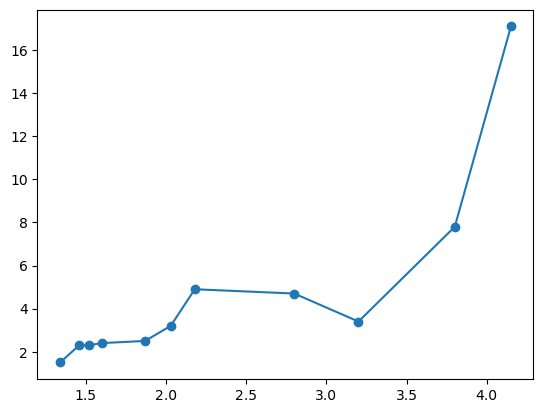

In [8]:
x=[1.34,1.46,1.52,1.6,1.87,2.03,2.18,2.8,3.2,3.8,4.15]
f=[1.5,2.3,2.3,2.4,2.5,3.2,4.9,4.7,3.4,7.8,17.1]
plt.plot(x,f,marker='o')
plt.show()

In [9]:
def trapz_int(x, f):
    integral = 0.0
    n = len(x)
    for i in range(0,n-1):
        h = x[i + 1] - x[i]
        integral += (f[i] + f[i + 1]) * h / 2
    return integral

In [10]:
x=[1.34,1.46,1.52,1.6,1.87,2.03,2.18,2.8,3.2,3.8,4.15]
f=[1.5,2.3,2.3,2.4,2.5,3.2,4.9,4.7,3.4,7.8,17.1]
print("The integral of the tabulated data is",trapz_int(x,f))

The integral of the tabulated data is 14.592500000000005


### Problem 2
Write a function in Python trap(f, a, b, N) which will evaluate the integral $\int_{a}^{b}f (x)dx$ using the trapezoidal rule with N steps. Also, develop a similar function simp(f, a, b, N) for the Simpson’s rule. Use these functions to evaluate the numerical integrals in the subsequent problems, wherever applicable.

In [12]:
def trap(f,a,b,N):
    if b==np.inf:
        b=1000
    #Here f is a mathematical function and N is the number of steps
    x=np.linspace(a,b,N)
    y=f(x)
    h=(b-a)/(N-1)
    s=(y[0] + y[-1]) / 2 + np.sum(y[1:-1])
    return s*h

In [13]:
def simp(f,a,b,N):
    if b==np.inf:
        b=1000
    if N%2==0:
        N=N+1
    x=np.linspace(a,b,N)
    y=f(x)
    h=(b-a)/(N-1)
    s=(y[0]+y[-1])+2*np.sum(y[2:-1:2])+4*np.sum(y[1:-1:2])
    return s*h/3

Use these functions to evaluate the following integrals in limits a to b for [a,b] interval divided into N(=
$2^n$, n = 1, 2, 3, ...10) intervals with:
1) Trapezoidal rule
2) Simpson’s rule


**(1)**
f(x)=$x^2$
from -1 to 1

[2.         0.81481481 0.69387755 0.67259259 0.66805411 0.6670026
 0.66674933 0.66668717 0.66667177 0.66666794]
[0.66666667 0.66666667 0.66666667 0.66666667 0.66666667 0.66666667
 0.66666667 0.66666667 0.66666667 0.66666667]


/var/folders/2j/yxqp0xj90fg7rv0r3y0x5gbh0000gn/T/ipykernel_2395/687895556.py:26: RuntimeWarning: divide by zero encountered in log
  plt.plot(N, np.log(es), color='blue', label='Simpson Error')


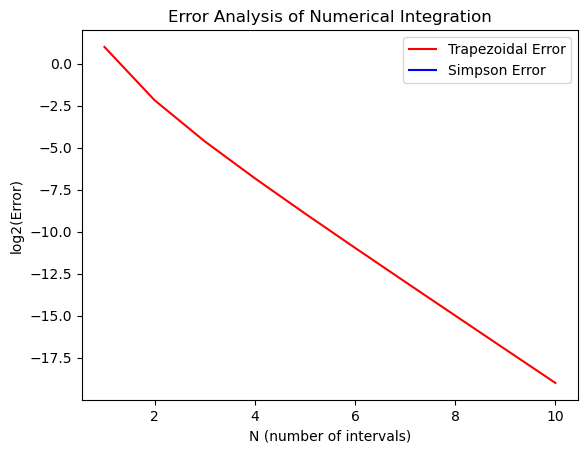

In [16]:
def f1(x):
    return x**2
rt=np.empty((0,),dtype='float64')
rs=np.empty((0,),dtype='float64')
for i in range(1,11):
    rt=np.append(rt,[trap(f1,-1,1,2**i)])
    rs=np.append(rs,[simp(f1,-1,1,2**i)])
print(rt)
print(rs)
yNt=rt
yNs=rs
yAN=[]
for i in range(0,len(rt)):
    yAN.append(2./3.)

et=[]
for i in range(0,len(yAN)):
    et.append(abs((yAN[i]-yNt[i])/yAN[i]))
es=[]
for i in range(0,len(yAN)):
    es.append(abs((yAN[i]-yNs[i])/yAN[i]))
N=range(1,11)
es=np.array(es,dtype='float64')
et=np.array(et)
plt.plot(N, np.log2(et), color='red', label='Trapezoidal Error')
plt.plot(N, np.log(es), color='blue', label='Simpson Error')
plt.xlabel('N (number of intervals)')
plt.ylabel('log2(Error)')
plt.legend()
plt.title('Error Analysis of Numerical Integration')
plt.show()


We are getting accurate values in the Simpson case hence the error goes to zero and the log value goes to -$\infty$ which can't be plotted thus, generating an error.

**(2)**
$f(x)=\sin (x)$
from 0 to $\pi$

[1.9236706937217898e-16, 1.8137993642342176, 1.9663166787658921, 1.992683831530769, 1.9982880169641721, 1.9995855373533806, 1.9998980128437513, 1.9999747029876502, 1.9999937004871184, 1.9999984281999588]
[2.0943951023931953, 2.0045597549844207, 2.000269169948388, 2.0000165910479355, 2.0000010333694127, 2.0000000645300022, 2.000000004032257, 2.0000000002520024, 2.00000000001575, 2.000000000000984]


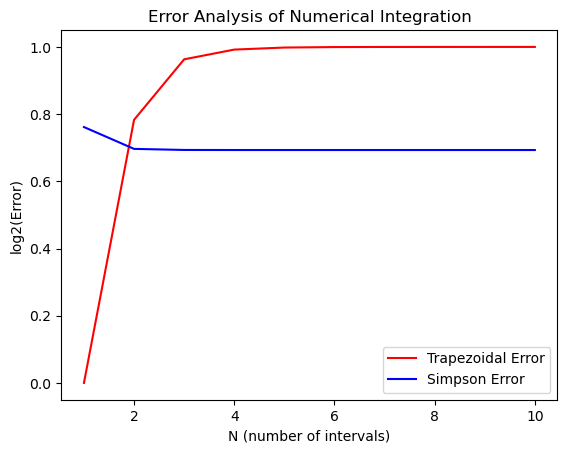

In [19]:
def f2(x):
    return np.sin(x)
rt=[]
rs=[]
for i in range(1,11):
    rt.append(trap(f2,0,np.pi,2**i))
    rs.append(simp(f2,0,np.pi,2**i))
print(rt)
print(rs)
yNt=rt
yNs=rs
yAN=[]
for i in range(0,len(rt)):
    yAN.append(2./3.)

et=[]
for i in range(0,len(yAN)):
    et.append(abs((yAN[i]-yNt[i])/yAN[i]))
es=[]
for i in range(0,len(yAN)):
    es.append(abs((yAN[i]-yNs[i])/yAN[i]))
N=range(1,11)
es=np.array(es,dtype='float64')
et=np.array(et)
plt.plot(N, np.log2(et), color='red', label='Trapezoidal Error')
plt.plot(N, np.log(es), color='blue', label='Simpson Error')
plt.xlabel('N (number of intervals)')
plt.ylabel('log2(Error)')
plt.legend()
plt.title('Error Analysis of Numerical Integration')
plt.show()

**(3)**
$f(x)=(\frac{\sin (x)}{x})^{2}$
from 0 to $ \infty $

[500.0002901981867, 166.66734251601324, 71.4366682317588, 33.34554098738323, 16.15854126073916, 7.951464092269108, 4.093158248176506, 2.1951536403532836, 1.5702205226748702, 1.570201624162673]
[166.66734700403978, 83.3388799616096, 41.67336687795912, 20.84062144519582, 10.424248749014904, 5.216062052436181, 2.8113487616121406, 1.5591958571982591, 1.365199056591513, 1.5701953464048382]


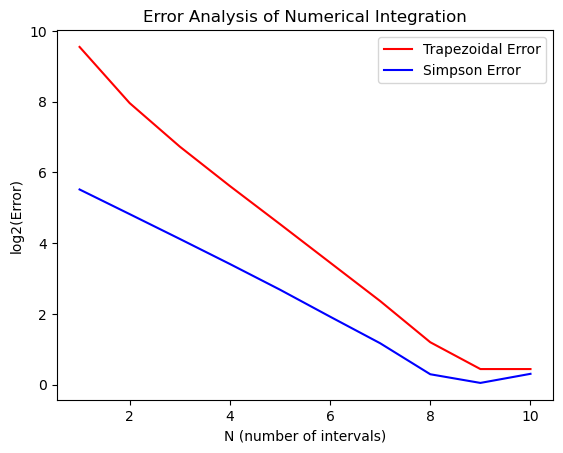

In [21]:
def f3(x):
    return (np.sin(x) / x) ** 2
rt=[]
rs=[]
for i in range(1,11):
    rt.append(trap(f3,0.0001,np.inf,2**i))
    rs.append(simp(f3,0.0001,np.inf,2**i))
print(rt)
print(rs)
yNt=rt
yNs=rs
yAN=[]
for i in range(0,len(rt)):
    yAN.append(2./3.)

et=[]
for i in range(0,len(yAN)):
    et.append(abs((yAN[i]-yNt[i])/yAN[i]))
es=[]
for i in range(0,len(yAN)):
    es.append(abs((yAN[i]-yNs[i])/yAN[i]))
N=range(1,11)
es=np.array(es,dtype='float64')
et=np.array(et)
plt.plot(N, np.log2(et), color='red', label='Trapezoidal Error')
plt.plot(N, np.log(es), color='blue', label='Simpson Error')
plt.xlabel('N (number of intervals)')
plt.ylabel('log2(Error)')
plt.legend()
plt.title('Error Analysis of Numerical Integration')
plt.show()

Taking a to be 0.001 since the value at 0 for the function is not defined

### Problem 3

| $f(x)$         | $x^6 − 7x^3 + 5$ | $x^2e^x−1$ | $\frac {\sin (x)}{\sqrt{x}}$ |
|--------------|----------------|----------|-----------------------------|
| a            | -1             | 0        | 0                           |
| b            | 1              | 5        | 1                           |



by using
1) Trapezoidal rule with 100 points
2) Simpson’s rule for with 51 point
3) Gauss quadrature method for 6 points \
And compare the values in a table.

Defining the Gauss quadrature function

In [25]:
def gauss(f,a,b,N=6):
    # approximate the integral as a weighted sum of the function's values at SPECFIC POINTS
    if N==2:
        w=[1.,1.]
        x=[-0.5773502691896257,-0.5773502691896257]
    if N==3:
        w=[0.8888888888888888,0.5555555555555556,0.5555555555555556]
        x=[0.0,-0.7745966692414834,0.7745966692414834]
    if N==4:
        w=[0.6521451548625461,0.6521451548625461,0.3478548451374538,0.3478548451374538]
        x=[-0.3399810435848563,0.3399810435848563,-0.8611363115940526,0.8611363115940526]
    if N==5:
        w=[0.5688888888888889,0.4786286704993665,0.4786286704993665,0.2369268850561891,0.2369268850561891]
        x=[0.,-0.5384693101056831,0.5384693101056831,-0.9061798459386640,0.9061798459386640]
    if N==6:
        w=[0.3607615730481386,0.3607615730481386,0.4679139345726910,0.4679139345726910,0.1713244923791704,0.1713244923791704]
        x=[0.6612093864662645,-0.6612093864662645,-0.2386191860831969,0.2386191860831969,-0.9324695142031521,0.9324695142031521]
    # Change of variable from x to t - i.e, change of limits
    # We would have gone with f(x), but now we need to go with f(t) where x=(b-a)*t/2+(b+a)/2
    def F(t):
        return f(((b-a)*t/2 )+(b+a)/2)
    s=0
    for i in range(0,len(w)):
        s+=w[i]*F(x[i])
    return s*(b-a)/2 #Scale the integral before returning since the dx changes
    

**(1)**
$f(x)=x^6-7x^3+5$ 
from -1 to 1

In [27]:
def f1(x):
    return (x**6-7*(x**3)+5)

t1=trap(f1,-1,1,100)
s1=simp(f1,-1,1,51)
g1=gauss(f1,-1,1,6)
l=[t1,s1,g1]
print(l)

[10.28612235181668, 10.285717695146667, 10.285714285714286]


The values are very close as in the above list.

**(2)**
$f(x)=x^2e^x−1$
from 0 to 5

In [30]:
def f2(x):
    return ((x**2)*(np.e**x)-1)

t2=trap(f2,0,5,100)
s2=simp(f2,0,5,51)
g2=gauss(f2,0,5,6)
l=[t2,s2,g2]
print(l)

[2517.1277749033525, 2516.0287216699257, 2516.023064612161]


Again, we have close values

**(3)**
$f(x)=\frac {\sin (x)}{\sqrt{x}}$
from 0 to 1

In [33]:
def f3(x):
    return (np.sin(x)/(x**0.5))

t3=trap(f3,0.00001,1,100)
s3=simp(f3,0.00001,1,51)
g3=gauss(f3,0.00001,1,6)
l=[t3,s3,g3]
print(l)

[0.620341815867543, 0.6203271776799139, 0.6209156369006721]


(Note that we have approximated 0 to 0.00001).
We again have close values.

### Problem 4
**The Double Integral**

Compute $ \int _0^1 \int _0^1 f(x,y)dxdy$ with h=k=0.25,
1) Formulate 2 dimensional Trapezoidal and Simpson coefficient matrices. You need to use the numpy function ‘meshgrid’ for this.
2) Evaluate the integral for: \
a) $f(x,y)=5x^3y+2x$ \
b) $f(x,y)=5xy-y^4$

In [224]:
def doubleint_trap(f,ax,bx,ay,by,h=0.25,k=0.25):
    xr=np.arange(ax,bx+h,h)
    yr=np.arange(ay,by+k,k)
    ct=np.ones((len(xr),len(yr)))
    ct[1:-1,0]=2
    ct[1:-1,-1]=2
    ct[0,1:-1]=2
    ct[-1,1:-1]=2
    ct[1:-1,1:-1]=4
    m,n=np.meshgrid(xr,yr,indexing='ij')
    z=f(m,n)
    return np.sum(z*(ct))*h*k*0.25

In [256]:
def doubleint_simp(f,ax,bx,ay,by,h=0.25,k=0.25):
    xr=np.arange(ax,bx+h,h)
    yr=np.arange(ay,by+k,k)
    if len(xr)%2==0:
        xr=xr[0:-1]
    if len(yr)%2==0:
        yr=yr[0:-1]
    ct=np.ones((len(xr),len(yr)))
    ct[1:-1:2,:]*=4
    ct[2:-1:2,:]*=2
    ct[:,1:-1:2]*=4
    ct[:,2:-1:2]*=2
    m,n=np.meshgrid(xr,yr,indexing='ij')
    z=f(m,n)
    return np.sum(z*(ct))*h*k*(1/9)

In [268]:
def f1(x,y):
    return (5*(x**3)*y+2*x)
print(doubleint_trap(f1,0,1,0,1))
print(doubleint_simp(f1,0,1,0,1))

1.6640625
1.625


In [270]:
def f2(x,y):
    return (5*x*y+2*x-(y**4))
print(doubleint_trap(f2,0,1,0,1))
print(doubleint_simp(f2,0,1,0,1))

2.029296875
2.0494791666666665
